<a href="https://colab.research.google.com/github/greentfrapp/lucent-notebooks/blob/master/notebooks/modelzoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install, Import

In [3]:
!pip install --quiet git+https://github.com/greentfrapp/lucent.git

In [4]:
import torch

from lucent.optvis import render, param, transform, objectives
from lucent.modelzoo.util import get_model_layers

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [8]:
from lucent.modelzoo import inceptionv1
from torchvision.models import resnet50
from torchvision.models import googlenet
from lucent.modelzoo import mobilenet_v2

In [9]:

inceptionv1_model = inceptionv1(pretrained=True)
_ = inceptionv1_model.to(device).eval()


resnet50_model = resnet50(pretrained=True).to(device).eval()


googlenet_model = googlenet(pretrained=True).to(device).eval()

mobilenet_v2_model = mobilenet_v2(pretrained=True).to(device).eval()

c:\Users\Administrator\miniconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to C:\Users\Administrator/.cache\torch\hub\checkpoints\mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:01<00:00, 7.36MB/s]


In [16]:
# Print the first 20 layer names
a=get_model_layers(inceptionv1_model)[:20]
print(a)
# Print the first 20 layer names
b=get_model_layers(resnet50_model)[:20]
print(b)
# Print the first 20 layer names
c=get_model_layers(googlenet_model)[:20]
print(c)
# Again print out first 20 layers
d=get_model_layers(mobilenet_v2_model)[:20]
print(d)

['conv2d0_pre_relu_conv', 'conv2d1_pre_relu_conv', 'conv2d2_pre_relu_conv', 'mixed3a_1x1_pre_relu_conv', 'mixed3a_3x3_bottleneck_pre_relu_conv', 'mixed3a_5x5_bottleneck_pre_relu_conv', 'mixed3a_pool_reduce_pre_relu_conv', 'mixed3a_3x3_pre_relu_conv', 'mixed3a_5x5_pre_relu_conv', 'mixed3b_1x1_pre_relu_conv', 'mixed3b_3x3_bottleneck_pre_relu_conv', 'mixed3b_5x5_bottleneck_pre_relu_conv', 'mixed3b_pool_reduce_pre_relu_conv', 'mixed3b_3x3_pre_relu_conv', 'mixed3b_5x5_pre_relu_conv', 'mixed4a_1x1_pre_relu_conv', 'mixed4a_3x3_bottleneck_pre_relu_conv', 'mixed4a_5x5_bottleneck_pre_relu_conv', 'mixed4a_pool_reduce_pre_relu_conv', 'mixed4a_3x3_pre_relu_conv']
['conv1', 'bn1', 'relu', 'maxpool', 'layer1', 'layer1_0', 'layer1_0_conv1', 'layer1_0_bn1', 'layer1_0_conv2', 'layer1_0_bn2', 'layer1_0_conv3', 'layer1_0_bn3', 'layer1_0_relu', 'layer1_0_downsample', 'layer1_0_downsample_0', 'layer1_0_downsample_1', 'layer1_1', 'layer1_1_conv1', 'layer1_1_bn1', 'layer1_1_conv2']
['conv1', 'conv1_conv', 'co

Then we can just use `render.render_vis` to generate a visualization of a channel at a particular layer.

100%|██████████| 512/512 [00:22<00:00, 22.77it/s]



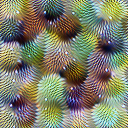

In [7]:
_ = render.render_vis(inceptionv1_model, "mixed4a:213", show_inline=True)

100%|██████████| 512/512 [00:26<00:00, 19.65it/s]



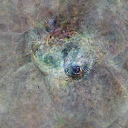

In [8]:
# We can try to optimize for "strawberry" which has label ID 229 for this model
_ = render.render_vis(inceptionv1_model, "labels:219", show_inline=True)

100%|██████████| 512/512 [00:21<00:00, 23.94it/s]



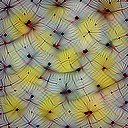

In [9]:
_ = render.render_vis(inceptionv1_model, "mixed4a:107", show_inline=True)

We can also try to optimize for a particular label by just passing "labels" as the layer name, which will use the last layer in the model.

But note that for this version of InceptionV1, the label IDs are different from the usual IDs. See [here](https://github.com/greentfrapp/lucent/blob/master/lucent/modelzoo/misc/old_imagenet_labels.txt) for the InceptionV1 IDs and [here](https://github.com/greentfrapp/lucent/blob/master/lucent/modelzoo/misc/imagenet_labels.txt) for the usual IDs.

  0%|          | 0/512 [00:00<?, ?it/s]

100%|██████████| 512/512 [00:28<00:00, 17.84it/s]



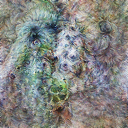

In [33]:
# cucumber
_ = render.render_vis(inceptionv1_model, "labels:743", show_inline=True)

100%|██████████| 512/512 [00:30<00:00, 16.75it/s]



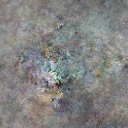

In [34]:
# orange
_ = render.render_vis(inceptionv1_model, "labels:319", show_inline=True)

100%|██████████| 512/512 [00:18<00:00, 27.01it/s]



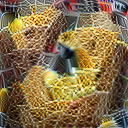

In [13]:
_ = render.render_vis(resnet50_model, "layer4_1_conv1:123", show_inline=True)

100%|██████████| 512/512 [00:18<00:00, 27.29it/s]



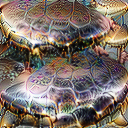

In [14]:
# render_vis works in the same way! Just substitute the appropriate layer name!
_ = render.render_vis(resnet50_model, "layer4_1_conv1:121", show_inline=True)

100%|██████████| 512/512 [00:19<00:00, 25.78it/s]



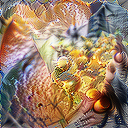

In [35]:
# orange
_ = render.render_vis(resnet50_model, "labels:950", show_inline=True)

100%|██████████| 512/512 [00:23<00:00, 21.47it/s]



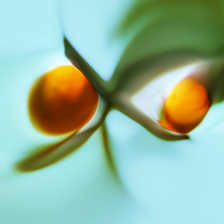

In [36]:
#orange cppn
cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model, "labels:950", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:20<00:00, 25.37it/s]



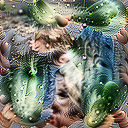

In [15]:
# Try to activate the cucumber, cuke label (943 for usual ImageNet mapping)
_ = render.render_vis(resnet50_model, "labels:943", show_inline=True)

100%|██████████| 512/512 [00:23<00:00, 21.55it/s]



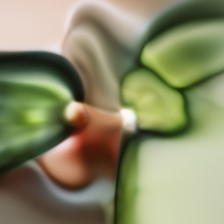

In [16]:
# Try to activate the cucumber, cuke label using CPPN parameterization
cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model, "labels:943", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:19<00:00, 25.83it/s]



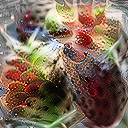

In [17]:
# Try to activate the strawberry label (949 for usual ImageNet mapping)
_ = render.render_vis(resnet50_model, "labels:949", show_inline=True)

100%|██████████| 512/512 [00:24<00:00, 20.99it/s]



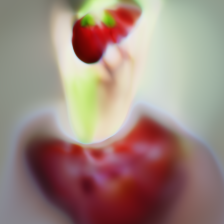

In [18]:
# Try to activate the strawberry label using CPPN parameterization
cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model, "labels:949", cppn_param_f, cppn_opt, show_inline=True)

  1%|          | 4/512 [00:00<00:15, 32.57it/s]

100%|██████████| 512/512 [00:16<00:00, 30.71it/s]



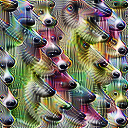

In [41]:
# Try to visualize same channel as above's mixed4a:213
_ = render.render_vis(googlenet_model, "inception4a:213", show_inline=True)

## Try it with other models from `torchvision`!

943 cucumber, cuke

949 strawberry

950 orange

405 airship, dirigible

407 ambulance

430 basketball

在imagenet_label.txt查看全部标签

  0%|          | 0/512 [00:00<?, ?it/s]

100%|██████████| 512/512 [00:20<00:00, 24.78it/s]



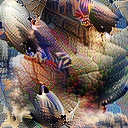

100%|██████████| 512/512 [00:23<00:00, 22.13it/s]



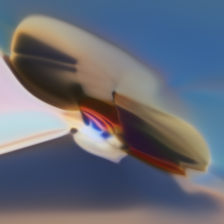

Initial loss: -0.291


100%|█████████▉| 511/512 [00:23<00:00, 22.45it/s]

Loss at step 512: -49.375



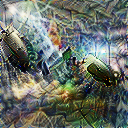

100%|██████████| 512/512 [00:23<00:00, 21.79it/s]



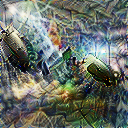

100%|██████████| 512/512 [00:24<00:00, 20.67it/s]



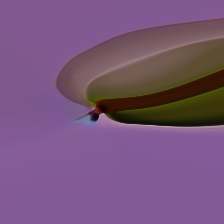

100%|██████████| 512/512 [00:21<00:00, 23.44it/s]



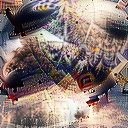

100%|██████████| 512/512 [00:23<00:00, 21.54it/s]



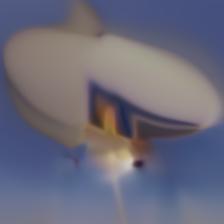

In [52]:
label = "405"
# More strawberries!
_ = render.render_vis(mobilenet_v2_model,  f"labels:{label}", show_inline=True)

# One last strawberry
_ = render.render_vis(mobilenet_v2_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)
# Try optimizing for the cucumber label again
_ = render.render_vis(googlenet_model,  f"labels:{label}", show_inline=True, verbose=True)
# Optimizing for strawberries with CPPN
_ = render.render_vis(googlenet_model, f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(resnet50_model,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:20<00:00, 24.71it/s]



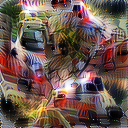

100%|██████████| 512/512 [00:22<00:00, 22.39it/s]



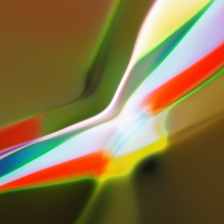

Initial loss: -0.690


100%|█████████▉| 510/512 [00:22<00:00, 22.51it/s]

Loss at step 512: -52.124



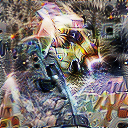

100%|██████████| 512/512 [00:22<00:00, 22.32it/s]



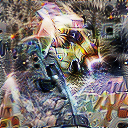

100%|██████████| 512/512 [00:25<00:00, 19.85it/s]



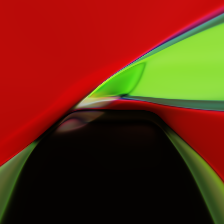

100%|██████████| 512/512 [00:22<00:00, 23.03it/s]



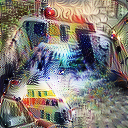

100%|██████████| 512/512 [00:22<00:00, 22.95it/s]



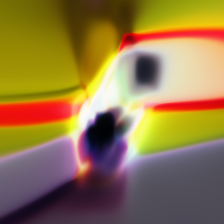

In [54]:
label = "407"
# More strawberries!
_ = render.render_vis(mobilenet_v2_model,  f"labels:{label}", show_inline=True)

# One last strawberry
_ = render.render_vis(mobilenet_v2_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)
# Try optimizing for the cucumber label again
_ = render.render_vis(googlenet_model,  f"labels:{label}", show_inline=True, verbose=True)
# Optimizing for strawberries with CPPN
_ = render.render_vis(googlenet_model, f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(resnet50_model,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

100%|██████████| 512/512 [00:20<00:00, 24.64it/s]



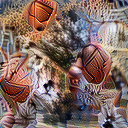

100%|██████████| 512/512 [00:23<00:00, 22.05it/s]



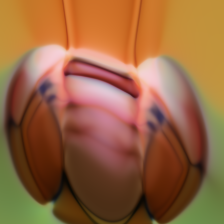

Initial loss: 0.877


100%|█████████▉| 510/512 [00:23<00:00, 20.80it/s]

Loss at step 512: -79.563



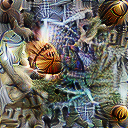

100%|██████████| 512/512 [00:23<00:00, 21.39it/s]



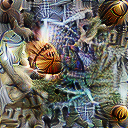

100%|██████████| 512/512 [00:26<00:00, 19.52it/s]



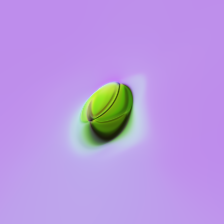

100%|██████████| 512/512 [00:21<00:00, 23.38it/s]



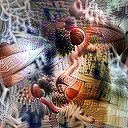

100%|██████████| 512/512 [00:24<00:00, 21.01it/s]



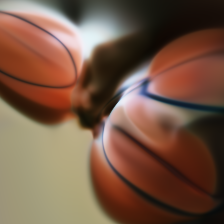

In [53]:
label = "430"
# More strawberries!
_ = render.render_vis(mobilenet_v2_model,  f"labels:{label}", show_inline=True)

# One last strawberry
_ = render.render_vis(mobilenet_v2_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)
# Try optimizing for the cucumber label again
_ = render.render_vis(googlenet_model,  f"labels:{label}", show_inline=True, verbose=True)
# Optimizing for strawberries with CPPN
_ = render.render_vis(googlenet_model, f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)

_ = render.render_vis(resnet50_model,  f"labels:{label}", show_inline=True)

cppn_param_f = lambda: param.cppn(224)
cppn_opt = lambda params: torch.optim.Adam(params, 5e-3)
_ = render.render_vis(resnet50_model,  f"labels:{label}", cppn_param_f, cppn_opt, show_inline=True)